In [1]:
!unzip sentiment_transfer_learning_tensorflow.zip

Archive:  sentiment_transfer_learning_tensorflow.zip
   creating: sentiment_transfer_learning_tensorflow/
  inflating: sentiment_transfer_learning_tensorflow/tokenizer_config.json  
  inflating: sentiment_transfer_learning_tensorflow/special_tokens_map.json  
  inflating: sentiment_transfer_learning_tensorflow/config.json  
  inflating: sentiment_transfer_learning_tensorflow/tokenizer.json  
  inflating: sentiment_transfer_learning_tensorflow/vocab.txt  
  inflating: sentiment_transfer_learning_tensorflow/tf_model.h5  


do you remember? we have a zip file containing our model files
lets unzip them

In [1]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

after importing related libraries we can load our model


(important--> we not only load our model but also load our tokenizer for our new dataset to apply)

In [2]:
# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("./sentiment_transfer_learning_tensorflow/")

# Load model
loaded_model = TFAutoModelForSequenceClassification.from_pretrained('./sentiment_transfer_learning_tensorflow/')

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at ./sentiment_transfer_learning_tensorflow/.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


let's test our loaded model with some sentences 

In [8]:
logitpreds = loaded_model(tokenizer(["He is useless, I dont know why he came to our neighbourhood",
                                "That guy is well", "He is such a retard"],
                               return_tensors="np",padding=True,truncation=True))['logits']

print(logitpreds)

tf.Tensor(
[[ 1.1681008 -1.9210767]
 [-2.0464416  1.2956457]
 [ 0.9326121 -1.7461478]], shape=(3, 2), dtype=float32)


lets convert them to standardized form of 0-1 with softmax function

In [14]:
import tensorflow as tf
import numpy as np
probabilities = tf.nn.softmax(logitpreds).numpy()
predictions = np.argmax(probabilities, axis=1)
print(predictions)

[0 1 0]


and lets see the result in positive and negative form

In [13]:
predict_score_and_class_dict = {0: 'Negative', 1: 'Positive'}

import numpy as np
for pred in predictions:
  print(predict_score_and_class_dict[pred])

Negative
Positive
Negative


now lets create a function to apply it to our dataframe

In [15]:
def predict_sentiment(text):
    # Process the text using the loaded tokenizer
    tokens = tokenizer(
        [text],
        return_tensors="tf",
        padding=True,
        truncation=True
    )

    # Get the model predictions
    preds = loaded_model(tokens)['logits']
    class_pred = np.argmax(preds, axis=1)[0]

    # Return the predicted sentiment label
    return predict_score_and_class_dict[class_pred]

In [17]:
import pandas as pd
df=pd.read_csv("McDonalds-Yelp-Sentiment-DFE.csv", encoding='latin-1')
df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review
0,679455653,False,finalized,3,2/21/15 0:36,RudeService\rOrderProblem\rFilthy,1.0\r0.6667\r0.6667,Atlanta,NaN,"I'm not a huge mcds lover, but I've been to be..."
1,679455654,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,Terrible customer service. Î¾I came in at 9:30...
2,679455655,False,finalized,3,2/21/15 0:26,SlowService\rOrderProblem,1.0\r1.0,Atlanta,NaN,"First they ""lost"" my order, actually they gave..."
3,679455656,False,finalized,3,2/21/15 0:27,na,0.6667,Atlanta,NaN,I see I'm not the only one giving 1 star. Only...
4,679455657,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,"Well, it's McDonald's, so you know what the fo..."
...,...,...,...,...,...,...,...,...,...,...
1520,679500008,False,finalized,3,2/21/15 0:13,OrderProblem,0.6754,Portland,NaN,I enjoyed the part where I repeatedly asked if...
1521,679500224,False,finalized,3,2/21/15 0:27,SlowService\rFilthy\rBadFood,1.0\r1.0\r1.0,Houston,NaN,Worst McDonalds I've been in in a long time! D...
1522,679500608,False,finalized,3,2/21/15 0:24,ScaryMcDs,0.6458,New York,NaN,"When I am really craving for McDonald's, this ..."
1523,679501257,False,finalized,3,2/21/15 0:32,ScaryMcDs,0.6407,Chicago,NaN,Two points right out of the gate: 1. Thuggery ...


In [18]:
df['result'] = df['review'].apply(predict_sentiment)

In [19]:
df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review,result
0,679455653,False,finalized,3,2/21/15 0:36,RudeService\rOrderProblem\rFilthy,1.0\r0.6667\r0.6667,Atlanta,NaN,"I'm not a huge mcds lover, but I've been to be...",Negative
1,679455654,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,Terrible customer service. Î¾I came in at 9:30...,Negative
2,679455655,False,finalized,3,2/21/15 0:26,SlowService\rOrderProblem,1.0\r1.0,Atlanta,NaN,"First they ""lost"" my order, actually they gave...",Negative
3,679455656,False,finalized,3,2/21/15 0:27,na,0.6667,Atlanta,NaN,I see I'm not the only one giving 1 star. Only...,Positive
4,679455657,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,"Well, it's McDonald's, so you know what the fo...",Positive
...,...,...,...,...,...,...,...,...,...,...,...
1520,679500008,False,finalized,3,2/21/15 0:13,OrderProblem,0.6754,Portland,NaN,I enjoyed the part where I repeatedly asked if...,Negative
1521,679500224,False,finalized,3,2/21/15 0:27,SlowService\rFilthy\rBadFood,1.0\r1.0\r1.0,Houston,NaN,Worst McDonalds I've been in in a long time! D...,Negative
1522,679500608,False,finalized,3,2/21/15 0:24,ScaryMcDs,0.6458,New York,NaN,"When I am really craving for McDonald's, this ...",Positive
1523,679501257,False,finalized,3,2/21/15 0:32,ScaryMcDs,0.6407,Chicago,NaN,Two points right out of the gate: 1. Thuggery ...,Negative


from this point on you can do hypothesis testing for computational social science analysis

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _unit_id                      1525 non-null   int64  
 1   _golden                       1525 non-null   bool   
 2   _unit_state                   1525 non-null   object 
 3   _trusted_judgments            1525 non-null   int64  
 4   _last_judgment_at             1525 non-null   object 
 5   policies_violated             1471 non-null   object 
 6   policies_violated:confidence  1471 non-null   object 
 7   city                          1438 non-null   object 
 8   policies_violated_gold        0 non-null      float64
 9   review                        1525 non-null   object 
 10  result                        1525 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(7)
memory usage: 120.8+ KB


SOME KIND OF VISUALISATIONS FOR DESCRIPTIVE ANALYSIS

) missing from current font.
  plt.tight_layout()
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


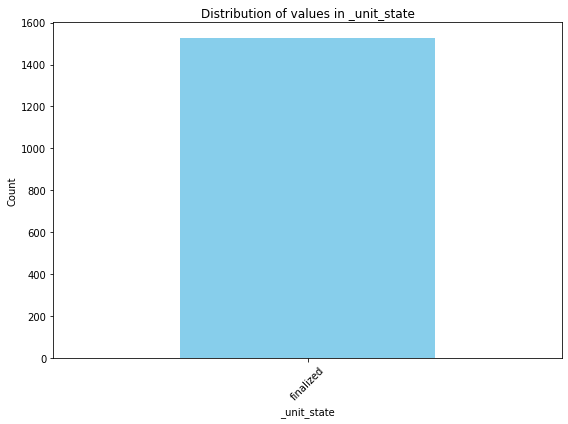

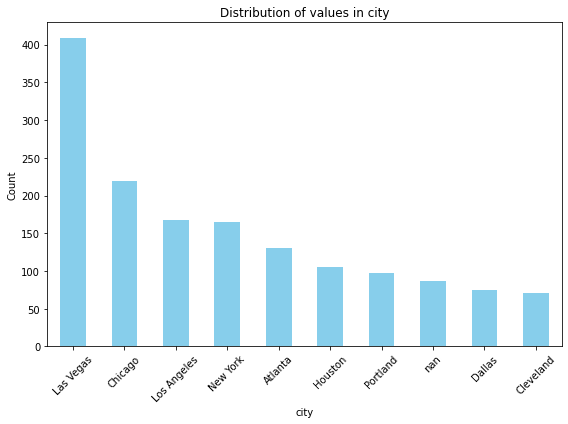

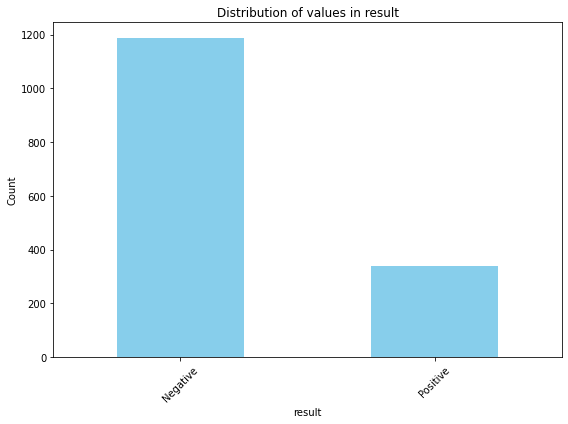

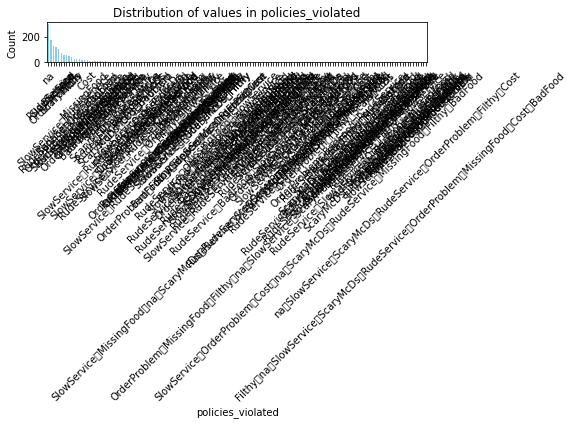

In [21]:
import matplotlib.pyplot as plt

# Columns to visualize
columns_to_visualize = ['_unit_state', 'city', 'result', 'policies_violated']

for column in columns_to_visualize:
    if column in df.columns:  # Checking if the column exists in the DataFrame
        plt.figure(figsize=(8, 6))
        value_counts = df[column].value_counts(dropna=False)
        value_counts.plot(kind='bar', color='skyblue')
        plt.title(f'Distribution of values in {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{column}' not found in the DataFrame.")

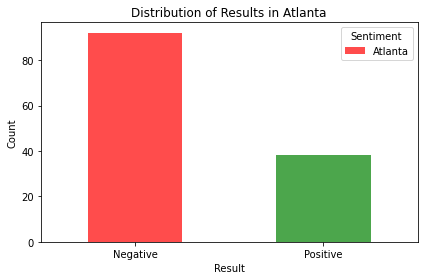

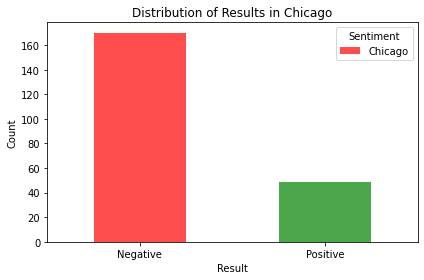

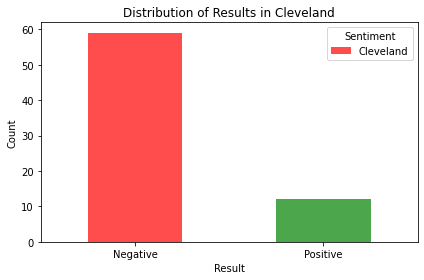

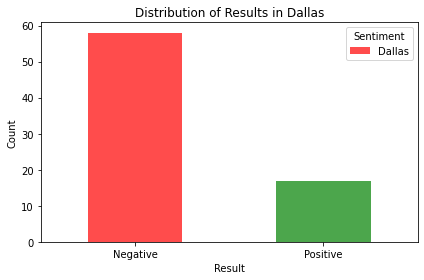

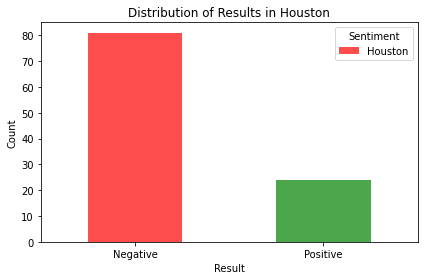

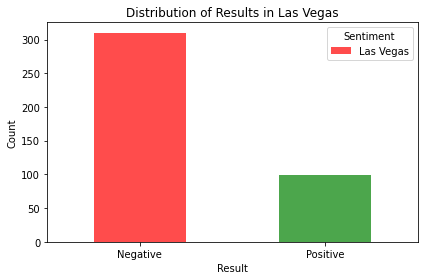

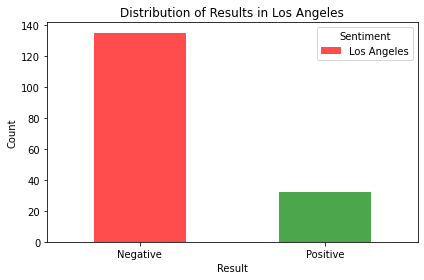

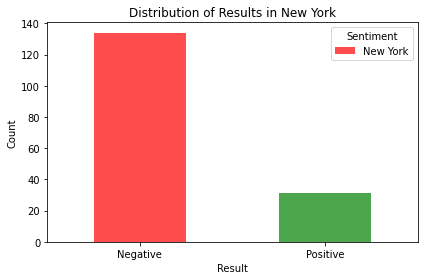

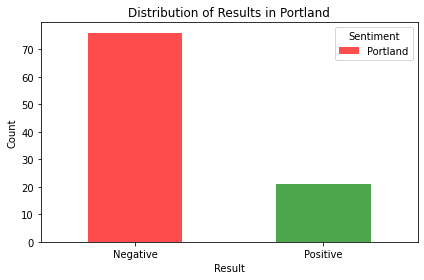

In [22]:
import matplotlib.pyplot as plt
# Assuming 'result' and 'city' are columns in your DataFrame 'df'
# Filtering out rows where 'result' is either 'Negative' or 'Positive'
filtered_df = df[df['result'].isin(['Negative', 'Positive'])]

# Grouping by 'city' and 'result' and counting occurrences
result_by_city = filtered_df.groupby(['city', 'result']).size().unstack(fill_value=0)

# Plotting separate graphs for each city
for city in result_by_city.index:
    city_data = result_by_city.loc[city]
    city_data.plot(kind='bar', color=['red', 'green'], alpha=0.7)
    
    plt.title(f'Distribution of Results in {city}')
    plt.xlabel('Result')
    plt.ylabel('Count')
    plt.legend(title='Sentiment')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

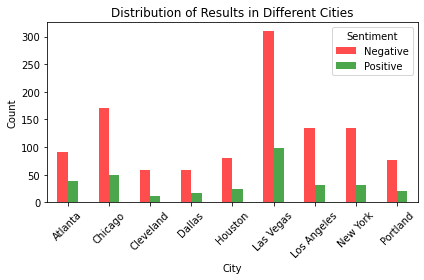

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'result' and 'city' are columns in your DataFrame 'df'
# Filtering out rows where 'result' is either 'Negative' or 'Positive'
filtered_df = df[df['result'].isin(['Negative', 'Positive'])]

# Grouping by 'city' and 'result' and counting occurrences
result_by_city = filtered_df.groupby(['city', 'result']).size().unstack(fill_value=0)

# Plotting a grouped bar chart for all cities
result_by_city.plot(kind='bar', stacked=False, color=['red', 'green'], alpha=0.7)

plt.title('Distribution of Results in Different Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-24-7a6c925ca940>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['_last_judgment_at'] = pd.to_datetime(filtered_df['_last_judgment_at'])


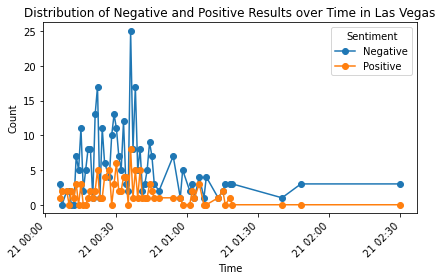

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'result', 'city', and '_last_judgment_at' are columns in your DataFrame 'df'
# Filtering rows for city='las vegas' and result='Negative' or result='Positive'
filtered_df = df[(df['city'] == 'Las Vegas') & df['result'].isin(['Negative', 'Positive'])]

# Converting '_last_judgment_at' column to datetime if it's not already in datetime format
filtered_df['_last_judgment_at'] = pd.to_datetime(filtered_df['_last_judgment_at'])

# Grouping by '_last_judgment_at' and 'result' and counting occurrences
result_by_time = filtered_df.groupby(['_last_judgment_at', 'result']).size().unstack(fill_value=0)

# Plotting a line graph for Las Vegas with time on x-axis and counts on y-axis
result_by_time.plot(kind='line', marker='o')

plt.title('Distribution of Negative and Positive Results over Time in Las Vegas')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-25-c593dd4352cc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['_last_judgment_at'] = pd.to_datetime(filtered_df['_last_judgment_at'], format='%m/%d/%y %H:%M')
<ipython-input-25-c593dd4352cc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['hour_of_day'] = filtered_df['_last_judgment_at'].dt.hour


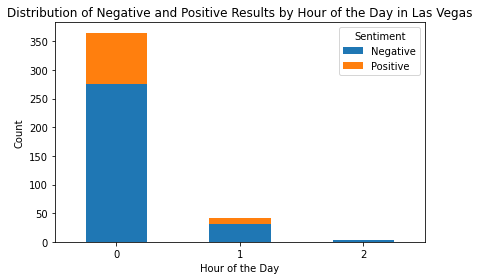

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'result', 'city', and '_last_judgment_at' are columns in your DataFrame 'df'
# Filtering rows for city='las vegas' and result='Negative' or result='Positive'
filtered_df = df[(df['city'] == 'Las Vegas') & df['result'].isin(['Negative', 'Positive'])]

# Convert '_last_judgment_at' column to datetime format
filtered_df['_last_judgment_at'] = pd.to_datetime(filtered_df['_last_judgment_at'], format='%m/%d/%y %H:%M')

# Extracting the hour of the day from '_last_judgment_at' column
filtered_df['hour_of_day'] = filtered_df['_last_judgment_at'].dt.hour

# Grouping by hour of the day and result, and counting occurrences
result_by_hour = filtered_df.groupby(['hour_of_day', 'result']).size().unstack(fill_value=0)

# Plotting a line graph for Negative and Positive results by hour of the day
result_by_hour.plot(kind='bar', stacked=True)

plt.title('Distribution of Negative and Positive Results by Hour of the Day in Las Vegas')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()